### Imports

In [44]:
import re
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite

### Helper functions

In [45]:
def get_words_list(text):
    return [x.lower() for x in re.findall(r'[a-zA-Z0-9_\(\)\|]+', text)]


def split_text_by_char(fileName, char):
    with open(fileName, 'r') as file:
        data = file.read().replace('\n', ' ')

    return data.split(char)


def get_bigrams_from_file_by_char(fileName, char):
    text_sentences = split_text_by_char(fileName, char)
    words_in_sentences = [get_words_list(sentence) for sentence in text_sentences]
    words_in_sentences = [x for x in words_in_sentences if x]
    bigrams = {}
    for sentence in words_in_sentences:
        for i in range(len(sentence)):
            if i < len(sentence) - 1:
                if sentence[i] + ', ' + sentence[i + 1] in bigrams.keys():
                    bigrams[sentence[i] + ', ' + sentence[i + 1]] += 1
                else:
                    bigrams[sentence[i] + ', ' + sentence[i + 1]] = 1
    bigrams = sorted(bigrams.items(), key=lambda x: x[1], reverse=True)
    return bigrams



# Functions to get stats
def get_top_n_bigrams(bigrams, n):
    return bigrams[:n]

def get_bigrams_with_frequency(bigrams, frequency):
    return [x for x in bigrams if x[1] >= frequency]

def get_bigrams_with_frequency_range(bigrams, min_frequency, max_frequency):
    return [x for x in bigrams if x[1] >= min_frequency and x[1] <= max_frequency]

def get_bigrams_with_frequency_range_and_n(bigrams, min_frequency, max_frequency, n):
    return [x for x in bigrams if x[1] >= min_frequency and x[1] <= max_frequency][:n]

def get_top_n_bigrams_with_frequency(bigrams, n, frequency):
    return [x for x in bigrams if x[1] >= frequency][:n]

def get_top_n_bigrams_with_frequency_range(bigrams, n, min_frequency, max_frequency):
    return [x for x in bigrams if x[1] >= min_frequency and x[1] <= max_frequency][:n]

def get_top_n_bigrams_with_frequency_range_and_n(bigrams, n, min_frequency, max_frequency, n2):
    return [x for x in bigrams if x[1] >= min_frequency and x[1] <= max_frequency][:n2][:n]


def get_bigrams_from_file_by_char_as_dict(fileName, char):
    text_sentences = split_text_by_char(fileName, char)
    words_in_sentences = [get_words_list(sentence) for sentence in text_sentences]
    words_in_sentences = [x for x in words_in_sentences if x]
    bigrams = {}
    for sentence in words_in_sentences:
        for i in range(len(sentence)):
            if i < len(sentence) - 1:
                if sentence[i] + ', ' + sentence[i + 1] in bigrams.keys():
                    bigrams[sentence[i] + ', ' + sentence[i + 1]] += 1
                else:
                    bigrams[sentence[i] + ', ' + sentence[i + 1]] = 1
    return bigrams

def get_top_n_bigrams_as_dict(bigrams, n):
    return dict(bigrams[:n])

### Look into the data

In [46]:
bigrams_sample = get_bigrams_from_file_by_char('../../resources/sample.txt', '.')
print(bigrams_sample)

[('dawida, ma', 2), ('ala, ma', 1), ('ma, kota', 1), ('kota, ma', 1), ('ma, ala', 1), ('kot, ma', 1), ('ma, ale', 1), ('ale, ma', 1), ('ma, kot', 1), ('ma, psa', 1), ('psa, ma', 1), ('ma, dawid', 1), ('pies, ma', 1), ('ma, dawida', 1), ('ma, pies', 1)]


In [47]:
bigrams_voynich = get_bigrams_from_file_by_char('../../resources/voynich.txt', '=')

In [48]:
bigrams_spanish_wiki = get_bigrams_from_file_by_char('../../resources/spanish_wiki.txt', '.')

In [49]:
# Top 10 bigrams in voynich.txt
top_20_bigrams_voynich = get_top_n_bigrams_as_dict(bigrams_voynich, 20)

# Top 10 bigrams in spanish_wiki.txt
top_20_bigrams_spanish_wiki = get_top_n_bigrams_as_dict(bigrams_spanish_wiki, 20)

In [50]:
print(top_20_bigrams_voynich)
print(top_20_bigrams_spanish_wiki)

{'dawida, ma': 2, 'ala, ma': 1, 'ma, kota': 1, 'kota, ma': 1, 'ma, ala': 1, 'kot, ma': 1, 'ma, ale': 1, 'ale, ma': 1, 'ma, kot': 1, 'ma, psa': 1}
{'toe, 8am': 30, 'toe, toe': 19, '8am, 8am': 12, '8am, hzg': 11, 'tor, 8am': 10, 'tg, 8am': 9, 'soe, 8am': 9, 'tor, toe': 8, 'toe, soe': 8, '8am, hzor': 8, '8am, so': 7, 'toe, tor': 7, '8am, 8ae': 7, '8am, tor': 7, 'or, am': 7, '8am, toe': 7, 'toe, hzoe': 6, '8am, hzoe': 6, 'hzg, 8am': 6, 'ohoe, toe': 6}
{'sistema, solar': 46, 'de, la': 43, 'm, s': 37, 'en, el': 34, 'n, de': 32, 'del, sistema': 29, 'los, planetas': 28, 'de, los': 21, 'a, la': 19, 'del, sol': 19, 'la, tierra': 19, 'di, metro': 19, 'en, la': 18, 'el, sol': 16, 'y, la': 15, 'a, os': 15, 'el, sistema': 14, 'cintur, n': 13, 'j, piter': 12, 'millones, de': 12}


### Visualize

C:\Users\olek_\AppData\Local\Temp\ipykernel_9144\3423796157.py:21: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


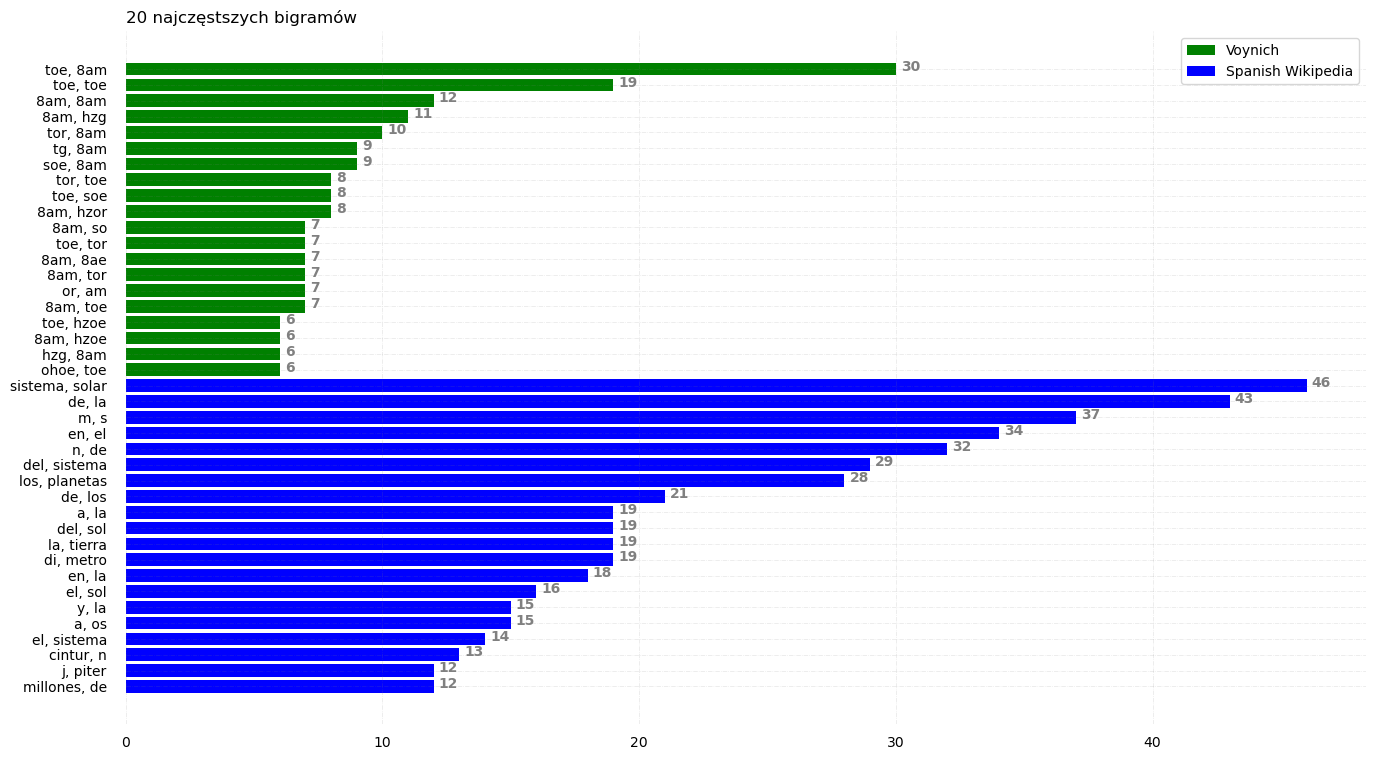

In [51]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(list(top_20_bigrams_voynich.keys()), list(top_20_bigrams_voynich.values()), color='green')
ax.barh(list(top_20_bigrams_spanish_wiki.keys()), list(top_20_bigrams_spanish_wiki.values()), color='blue')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('20 najczęstszych bigramów',
             loc ='left', )
             
 
# Show Plot
plt.legend(['Voynich', 'Spanish Wikipedia'])
plt.show()